Dataset Preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

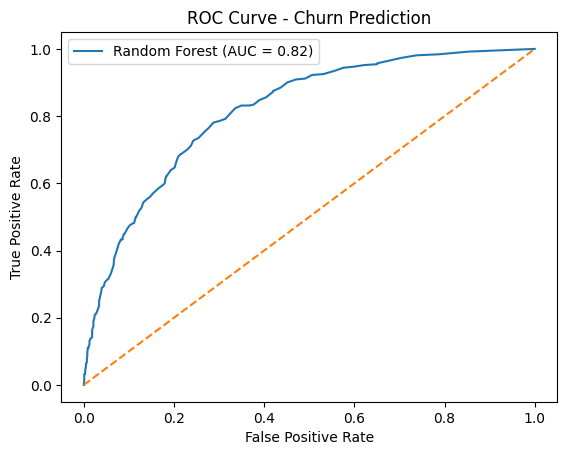

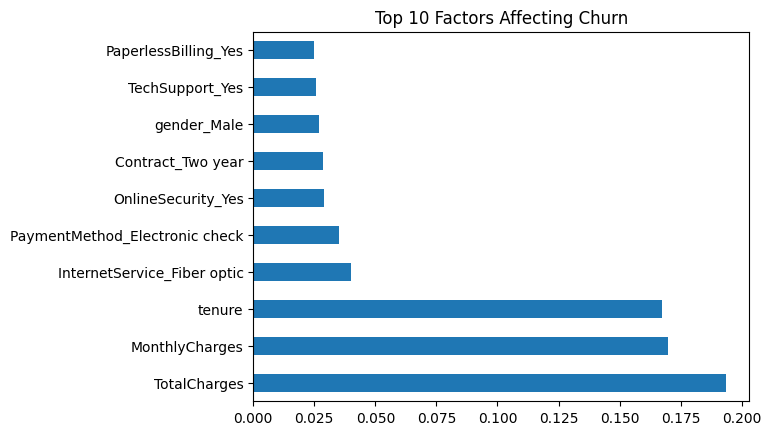


Business Insights:
- Contract type, tenure, and monthly charges strongly influence churn.
- Customers with month-to-month contracts show higher churn risk.
- Longer tenure customers are less likely to churn.


In [17]:
# =========================
# Customer Churn Prediction System
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# -------------------------
# Load Dataset
# -------------------------

df = pd.read_csv(r"C:\FUTURE_ML_02\data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# -------------------------
# Data Cleaning
# -------------------------

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

print("\nAfter Cleaning Shape:", df.shape)

# -------------------------
# Encode Categorical Features
# -------------------------

df = pd.get_dummies(df, drop_first=True)
print("After Encoding Shape:", df.shape)

# -------------------------
# Train-Test Split
# -------------------------

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# Logistic Regression Model
# -------------------------

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\n--- Logistic Regression Results ---")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# -------------------------
# Random Forest Model
# -------------------------

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# -------------------------
# ROC Curve
# -------------------------

rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
auc = roc_auc_score(y_test, rf_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction")
plt.legend()
plt.show()

# -------------------------
# Feature Importance
# -------------------------

importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure()
top10.plot(kind='barh')
plt.title("Top 10 Factors Affecting Churn")
plt.show()

# -------------------------
# Business Insight Print
# -------------------------

print("\nBusiness Insights:")
print("- Contract type, tenure, and monthly charges strongly influence churn.")
print("- Customers with month-to-month contracts show higher churn risk.")
print("- Longer tenure customers are less likely to churn.")









